In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from pytt.utils import read_pickle
from utils import precision_recall_f1
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np
from torch import tensor # TODO: take out when bug fixed

In [2]:
df = pd.read_csv("/Users/jeredmcinerney/Desktop/summary_stats.csv")
df

,Unnamed: 0,code_name,code_idx,attention,traceback_attention,label,score,depth,num_report_sentences,patient_id,timepoint_id,reference_sentence_rankings
0,0,430-438,3236,6.529195,8.555001,1,-1.068779,2,tensor(1000),104388346,1577117,"[248, 328, 332, 274]"
1,1,custom2,3321,6.443380,8.557752,1,-1.022282,1,tensor(1000),106043972,383599,[205]
2,2,340,3224,6.483103,8.462690,1,-0.298576,2,tensor(1000),106043972,383599,"[298, 457]"
3,3,custom5,3330,5.575617,7.519377,1,-0.243326,4,tensor(1000),106043972,383599,"[136, 257, 140, 418, 298, 351, 269, 283, 401, ..."
4,0,431,3237,6.223360,8.371784,1,-0.217192,3,tensor(774),100022433,1355999,"[238, 267, 305, 237, 235, 218]"
5,1,"('ICD10', 'G911')",2067,6.343720,8.501729,1,-0.010563,4,tensor(774),100022433,1355999,"[428, 295, 417, 420, 438]"
6,2,432.1,3240,6.413177,8.561061,1,0.022613,4,tensor(774),100022433,1355999,[325]
7,3,430-438,3236,6.532923,8.669078,1,0.144095,2,tensor(774),100022433,1355999,"[232, 132, 173]"
8,4,custom2,3321,6.178119,8.241480,1,-0.914761,1,tensor(765),100935567,1165251,"[136, 296, 212]"
9,5,410-414,3232,3.946661,5.937870,1,1.937936,2,tensor(765),100935567,1165251,[15]


In [14]:
rankings = sum([(np.array(eval(row.reference_sentence_rankings))/eval(row.num_report_sentences).item()).tolist() for i,row in df.iterrows()], [])

[0, 1, 0, 200]

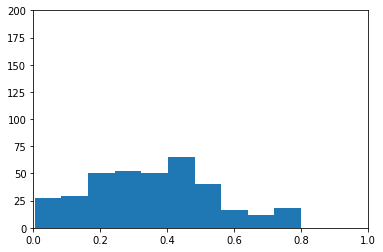

In [80]:
plt.hist(rankings, bins=10)
plt.axis([0, 1, 0, 200])

In [16]:
sentence_rankings, sentence_labels = [], []
for i,row in df.iterrows():
    num_report_sentences = eval(row.num_report_sentences).item()
    sentence_rankings_temp = list(range(num_report_sentences))
    reference_sentence_rankings = set(eval(row.reference_sentence_rankings))
    sentence_labels_temp = [(i in reference_sentence_rankings) for i in sentence_rankings_temp]
    sentence_rankings += (np.array(sentence_rankings_temp)/num_report_sentences).tolist()
    sentence_labels += sentence_labels_temp

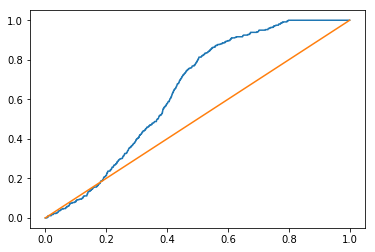

In [70]:
fpr, tpr, thresholds= roc_curve(np.array(sentence_labels, dtype=np.float), -np.array(sentence_rankings, dtype=np.float))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.savefig('/Users/jeredmcinerney/Desktop/roc.png')

[0, 0.02, 0, 1]

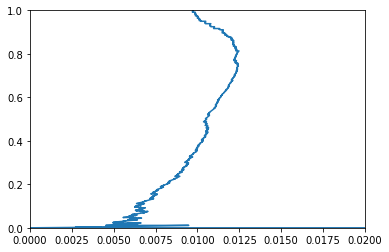

In [82]:
precision, recall, thresholds = precision_recall_curve(np.array(sentence_labels, dtype=np.float), -np.array(sentence_rankings, dtype=np.float))
plt.plot(precision, recall)
plt.axis([0,.02,0,1])


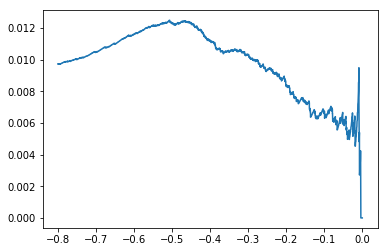

In [67]:
precision, recall, thresholds = precision_recall_curve(np.array(sentence_labels, dtype=np.float), -np.array(sentence_rankings, dtype=np.float))
plt.plot(thresholds, precision[:-1])
# plt.axis([0,.1, 0, .1])

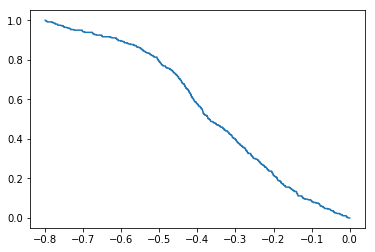

In [68]:
plt.plot(thresholds, recall[:-1])

In [50]:
precision.shape

(5170,)

In [51]:
recall.shape

(5170,)

In [52]:
thresholds.shape

(5169,)

In [23]:
sentence_rankings

[0.0,
 0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.011,
 0.012,
 0.013,
 0.014,
 0.015,
 0.016,
 0.017,
 0.018,
 0.019,
 0.02,
 0.021,
 0.022,
 0.023,
 0.024,
 0.025,
 0.026,
 0.027,
 0.028,
 0.029,
 0.03,
 0.031,
 0.032,
 0.033,
 0.034,
 0.035,
 0.036,
 0.037,
 0.038,
 0.039,
 0.04,
 0.041,
 0.042,
 0.043,
 0.044,
 0.045,
 0.046,
 0.047,
 0.048,
 0.049,
 0.05,
 0.051,
 0.052,
 0.053,
 0.054,
 0.055,
 0.056,
 0.057,
 0.058,
 0.059,
 0.06,
 0.061,
 0.062,
 0.063,
 0.064,
 0.065,
 0.066,
 0.067,
 0.068,
 0.069,
 0.07,
 0.071,
 0.072,
 0.073,
 0.074,
 0.075,
 0.076,
 0.077,
 0.078,
 0.079,
 0.08,
 0.081,
 0.082,
 0.083,
 0.084,
 0.085,
 0.086,
 0.087,
 0.088,
 0.089,
 0.09,
 0.091,
 0.092,
 0.093,
 0.094,
 0.095,
 0.096,
 0.097,
 0.098,
 0.099,
 0.1,
 0.101,
 0.102,
 0.103,
 0.104,
 0.105,
 0.106,
 0.107,
 0.108,
 0.109,
 0.11,
 0.111,
 0.112,
 0.113,
 0.114,
 0.115,
 0.116,
 0.117,
 0.118,
 0.119,
 0.12,
 0.121,
 0.122,
 0.123,
 0.124,
 0.125,
 0.126,